<a href="https://colab.research.google.com/github/alizmarossy/FAKT_ML/blob/main/FAKT_kurzus_4_2_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlexNet órai file lemásolása és saját képekre próbálása

### CIFAR10 adatbázis importálása

In [2]:
from tensorflow import keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
class_names = ['repülő', 'autó', 'madár', 'macska', 'szarvas', 'kutya', 'béka', 'ló', 'hajó', 'kamion']

In [6]:
import matplotlib.pyplot as plt

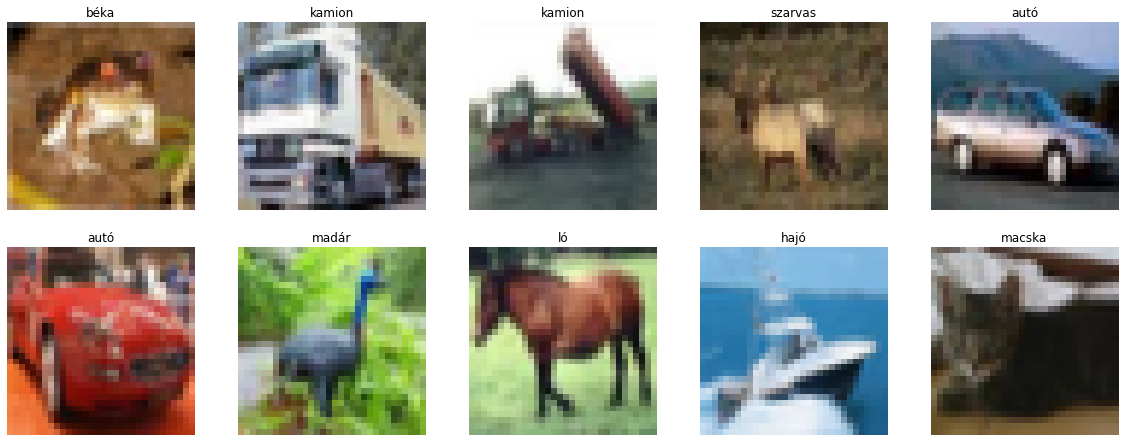

In [7]:
plt.figure(figsize=(20,20))
for i in range(10):
    image = x_train[i]
    label = y_train[i]
    ax = plt.subplot(5,5,i+1)
    plt.title(class_names[label[0]])
    plt.imshow(image)
    plt.axis('off')


## Adatok formálása

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## AlexNet elkészítése

In [12]:
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
input = Input(shape=(32,32,3)) # A baj ott kezdődött, hogy túl nagy a hálónk ilyen kis méretű képekhez. Ha megnézitek a summaryt, a konvolúciós rétegek közti feature mapek (3D mátrixok) 2x2xmélység méretűek, ami hát elég kicsi. Megoldásként kikommentezhetünk jó pár réteget, még így is lecsökken 2x2-re de így már tud tanulni a háló. Earlystopping patiencenek nyugodtan adhattok magasabb értéket, akár 20-50 et is, mert ha végiggondoljátok bajt nem okozhattok vele, csak a tanulási idő nő max meg ha kimentünk egy lokális optimumból és tovább tud tanulni.

x = Conv2D(filters=64, kernel_size=5, strides=4, activation='relu', padding='same')(input)
x = MaxPooling2D(pool_size=2, strides=2)(x)
# x = Conv2D(filters=256, kernel_size=5, activation='relu', padding='same')(x)
# x = MaxPooling2D(pool_size=2, strides=2)(x)
# x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
# x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
# x = Conv2D(filters=192, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Flatten()(x)

# x = Dense(4096, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.4)(x)

output = Dense(len(class_names), activation='softmax')(x)

In [14]:
AlexNet = keras.Model(input, output)

In [15]:
AlexNet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 64)          4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 64)         0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 4096)              105267

In [16]:
AlexNet.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [19]:
AlexNet.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping_callback])

Epoch 1/100
1407/1407 [==============================] - 18s 6ms/step - loss: 1.6712 - accuracy: 0.3876 - val_loss: 1.5166 - val_accuracy: 0.4536
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4422 - accuracy: 0.4810 - val_loss: 1.3920 - val_accuracy: 0.5014
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3427 - accuracy: 0.5160 - val_loss: 1.3665 - val_accuracy: 0.5118
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2737 - accuracy: 0.5426 - val_loss: 1.2414 - val_accuracy: 0.5582
Epoch 5/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.2235 - accuracy: 0.5630 - val_loss: 1.2335 - val_accuracy: 0.5566
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1741 - accuracy: 0.5822 - val_loss: 1.1913 - val_accuracy: 0.5786
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.1277 - accuracy: 0.5990 - val_loss: 1.1488 - val_a

## Modell predikciók

### Eredeti teszt adatbázison

In [20]:
x_test.shape[0] # Van ennyi darab tesztképünk

10000

In [21]:
predictions = AlexNet.predict(x_test)

In [22]:
type(predictions) # Egy nagy numpy array az egész

numpy.ndarray

In [23]:
predictions.shape # Két dimenziós, áll 10000 darab 10 hosszúságú vektorból. Azért 10 darab, mert 10 neuron volt az output rétegünk. Vagyis amit itt látunk, az a 10 output neuron értéke, amik a mi predikcióink minden egyes osztályra. 10 osztály, 10 neuron, 10 predikált 0-1 közti szám, vagyis valószínűség!

(10000, 10)

In [24]:
predictions[0] # Vizsgáljuk meg a legelső tesztkép predkcióját. Látszik a 10 darab valószínűség. 

array([1.9228611e-02, 2.2717811e-04, 5.4881010e-02, 2.2339998e-01,
       2.5970908e-02, 6.6224235e-01, 6.7795990e-03, 6.2746676e-03,
       8.2560838e-04, 1.7002558e-04], dtype=float32)

In [25]:
predictions[0].sum() # Ellenőrizhetjük hogy a softmax jól működik-e, valóban 1 az összes osztály valószínűségeinek összege.

1.0

In [26]:
predictions[0].max() # Nekünk a legmagasabb valószínűség fog kelleni, emellett döntött a modell. Látjuk hogy 10%-ig biztos benne. 

0.66224235

In [27]:
import numpy as np

In [28]:
np.argmax(predictions[0]) # Mivel minden neuron egy osztály reprezentál, így a legmagasabb érték sorszáma visszaadja az osztályt. Ebben az esetben a 3. 

5

In [29]:
class_names[np.argmax(predictions[0])] # Ha indexként felhasználjuk, akkor ki is írhatjuk, mi volt ez az osztály. 

'kutya'

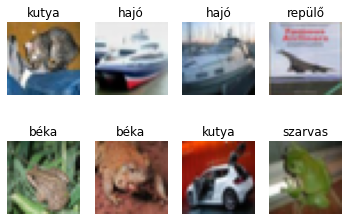

In [30]:
# Pár predikciót nézzünk meg vizuálisan is felhasználva az eddigi tudásunkat
for i in range(8):
    image = x_test[i]
    highest_neuron = np.argmax(predictions[i])
    predicted_class = class_names[highest_neuron]

    ax = plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(predicted_class)
    plt.axis('off')

### Saját képekkel

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
from PIL import Image
import numpy as np

In [34]:
image = Image.open('/content/drive/My Drive/plane.png') # Betöljük

In [35]:
image = image.resize((32, 32)) # Átméretezzük

In [36]:
image = np.asarray(image)/255 # Numpy array-á változtatjuk és normalizáljuk

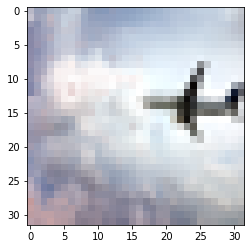

In [37]:
plt.imshow(image)

In [38]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2] )) # 1 a batch méretűvé tesszük, hogy a modell megkajálja

In [39]:
prediction = AlexNet.predict(image) # Predikálunk vele

In [40]:
confidence = round(prediction.max()*100) # Megnézzük mennyire tartja valószínűnek

In [41]:
confidence # Elég biztos benne

79

In [42]:
predicted_class = class_names[np.argmax(prediction)]

In [43]:
print(f'A modell szerint a képen egy {predicted_class} van. \n Legalábbis {confidence}%-ig biztos benne.') # \n-el tudtok új sort kezdeni a printben

A modell szerint a képen egy repülő van. 
 Legalábbis 79%-ig biztos benne.


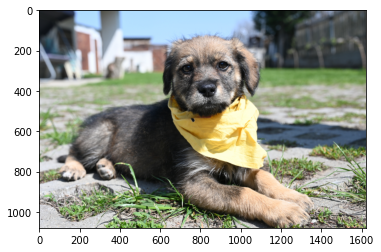

In [46]:
image = Image.open('/content/drive/My Drive/DSC_0278.JPG')
plt.imshow(image)

A modell szerint a képen egy ló van. 
 Legalábbis 100%-ig biztos benne.


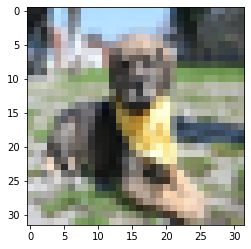

In [47]:
image = image.resize((32, 32))
image = np.asarray(image)
plt.imshow(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2] ))
prediction = AlexNet.predict(image)
confidence = round(prediction.max()*100)
predicted_class = class_names[np.argmax(prediction)]
print(f'A modell szerint a képen egy {predicted_class} van. \n Legalábbis {confidence}%-ig biztos benne.')
##pedig kutya akart lenni :()

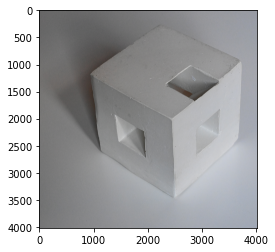

In [48]:
image = Image.open('/content/drive/My Drive/DSC_2153.JPG')
plt.imshow(image)

A modell szerint a képen egy repülő van. 
 Legalábbis 100%-ig biztos benne.


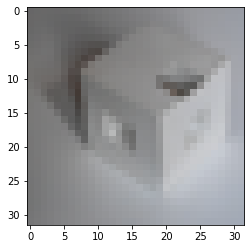

In [49]:
image = image.resize((32, 32))
image = np.asarray(image)
plt.imshow(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2] ))
prediction = AlexNet.predict(image)
confidence = round(prediction.max()*100)
predicted_class = class_names[np.argmax(prediction)]
print(f'A modell szerint a képen egy {predicted_class} van. \n Legalábbis {confidence}%-ig biztos benne.')
##pedig egy makett akart lenni :()

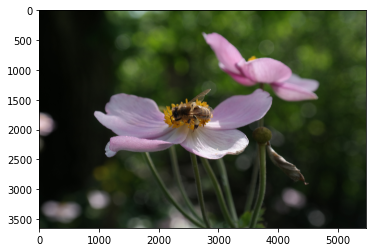

In [50]:
image = Image.open('/content/drive/My Drive/07290028.JPG')
plt.imshow(image)

A modell szerint a képen egy kutya van. 
 Legalábbis 100%-ig biztos benne.


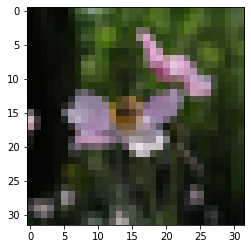

In [51]:
image = image.resize((32, 32))
image = np.asarray(image)
plt.imshow(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2] ))
prediction = AlexNet.predict(image)
confidence = round(prediction.max()*100)
predicted_class = class_names[np.argmax(prediction)]
print(f'A modell szerint a képen egy {predicted_class} van. \n Legalábbis {confidence}%-ig biztos benne.')
##pedig egy virág akart lenni :(
  ##ez a 100% azért érdekes